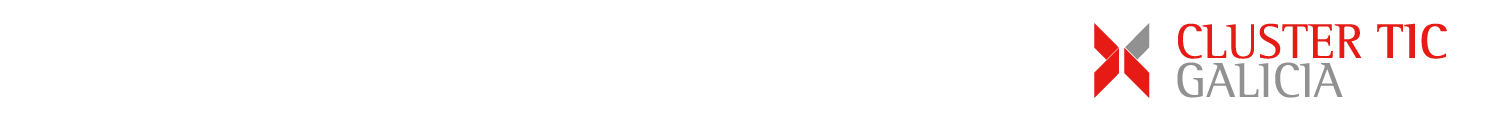
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Creación de librerías</div>

Hemos visto cómo crear funciones y clases. Hasta ahora todas ellas se creaban y almacenaban en nuestro cuaderno Jupyter, lo que no siempre es lo más cómodo. Una solución más eficiente y que implifica la compartición y reutilización de código es la creación de librerías. Éstas son ficheros planos con extensión ".py" en los que creamos nuestras funciones y clases. Se muestra a continuación una captura de pantalla con el comienzo de uno de estos ficheros:

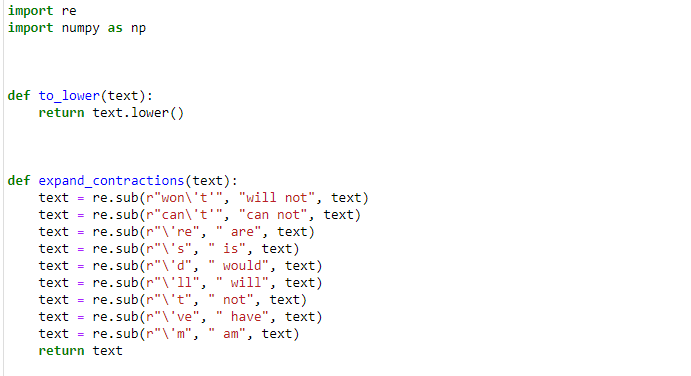

El fichero mostrado se llama **utils.py**. Para importar su funcionalidad podemos, o bien importar el módulo:

In [1]:
import utils

y acceder a las funciones y métodos con el prefijo "*utils*" (*utils.to_lower*, etc.), o bien importar los objetos por separado:

In [2]:
from utils import to_lower, expand_contractions

y usar estos objetos referenciándolos directamente por su nombre, tal y como haríamos con cualquier otra librería.

Lógicamente, el fichero en cuestión debe ser visible desde el cuaderno Jupyter que estemos usando. Si está en la misma carpeta no hay problema. Si está en otra carpeta (por ejemplo, en "librerías") podríamos usar el siguiente método:

In [3]:
import os
os.chdir(".") # A cambiar por el path correcto en el que se encuentre la librería
import utils

<div style="font-size: 40px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">La variable __name__</div>
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Un fichero conteniendo código Python se puede ejecutar en dos escenarios distintos: cuando lo cargamos, por ejemplo, en Jupyter y lo ejecutamos (es decir, cuando es nuestro fichero principal), y cuando se importa como librería (es decir, cuando no es nuestro fichero principal).

En cualquiera de los dos casos, hay una variable especial -asociada a cada uno de los ficheros con los que estemos trabajando- denominada **\_\_name__** que recibe un valor que depende de si el fichero en cuestión se ha ejecutado como programa principal o si se ha importado. Si se ha ejecutado como programa principal dicha variable tomará el valor "*\_\_main__*", y si se ha ejecutado al ser importado como librería recibirá el nombre que tenga dicha librería (por ejemplo "*utils*").

Para ver esto en funcionamiento vamos a crear un fichero Python que vamos a leer desde *Visual Studio Code* (o desde algún IDE semejante), fichero al que vamos a llamar "*fichero1.py*". El contenido de este fichero va a ser simplemente:

<div style="background:#f7f7f7;padding:10px;border:1px #ccc solid">
print("fichero1:", __name__)
</div>

Si ejecutamos el fichero obtenemos como única salida la siguiente:

fichero1: \_\_main__

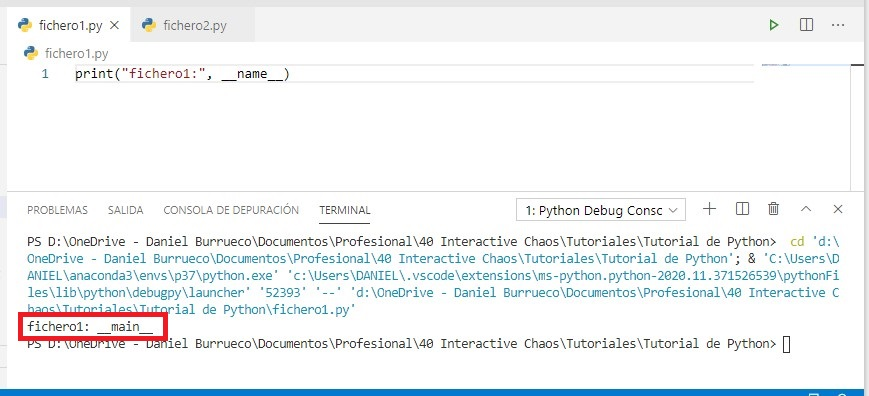

Esto es así pues nuestro código es el programa principal y, por lo tanto, la variable *\_\_name__* recibirá el texto "*\_\_main__*" tal y como se ha comentado.

Ahora creemos un segundo fichero, de nombre *fichero2.py* que contenga código semejante al anterior:

<div style="background:#f7f7f7;padding:10px;border:1px #ccc solid">
print("fichero2:", __name__)
</div>

Si lo ejecutamos, volvemos a obtener un resultado equivalente:

fichero2: \_\_main__

Nuevamente, la variable *\_\_name__* ha recibido como valor el texto "*\_\_main__*" y el motivo es por haber ejecutado este fichero como programa principal.

Ahora bien ¿qué se mostraría en pantalla si desde el fichero 1 importamos el fichero 2 como librería? Veámoslo. Ahora el código del primer fichero es:

<div style="background:#f7f7f7;padding:10px;border:1px #ccc solid">
import fichero2

print("fichero1:", \_\_name__)
</div>

(se supone que ambos ficheros se encuentran en la misma carpeta)

La ejecución del código devuelve el siguiente resultado:

fichero2: fichero2

fichero1: \_\_main__

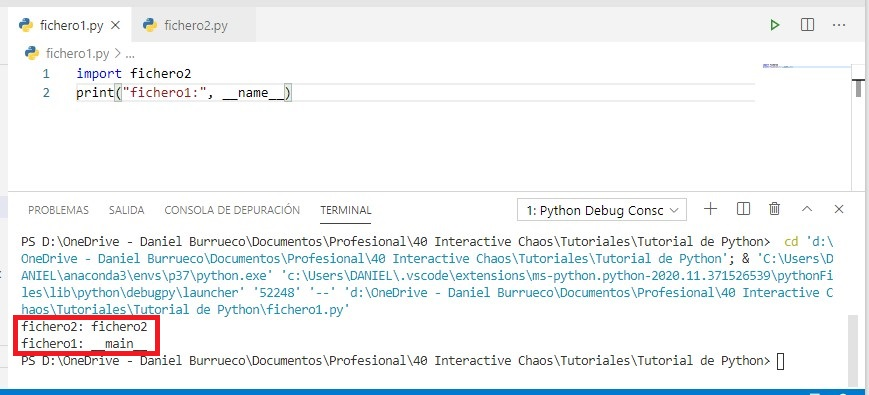

Para entender el motivo conviene analizar el orden de ejecución del código:

1. En primer lugar se importa la librería "*fichero2*", lo que provoca la ejecución del print que hay en dicha librería. Como ese fichero se está importando como librería (no es nuestro programa principal) la variable *\_\_name__* recibe como valor el nombre de la librería: "*fichero2*", y esto es lo que se imprime.
1. A continuación se ejecuta el *print* de nuestro fichero principal. En este caso la variable *\_\_name__* ha recibido el valor *\_\_main__* (por tratarse del fichero principal), que es lo que vemos en pantalla.

<div style="font-size: 40px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Utilidad de la variable __name__</div>
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Una vez que entendemos el contenido de esta variable podríamos preguntarnos qué utilidad tiene su uso. Pues bien, la principal utilidad es para restringir la ejecución de cierta parte del código solo cuando el fichero esté siendo ejecutado como programa principal (o solo cuando esté siendo ejecutado al ser importado como librería). Siguiendo con el ejemplo anterior, supongamos que queremos que la función *print* de nuestro *fichero2* solo se ejecute cuando estemos ejecutando dicho código como programa principal. Bastaría con modificar dicho fichero del siguiente modo:

<div style="background:#f7f7f7;padding:10px;border:1px #ccc solid">
if __name__ == "__main__":<br>    
&nbsp;&nbsp;&nbsp;&nbsp;print("fichero2:", __name__)
</div>

Ahora, si ejecutamos este fichero (como programa principal) el resultado será el siguiente:

fichero2: \_\_main__

pues se cumple la condición.

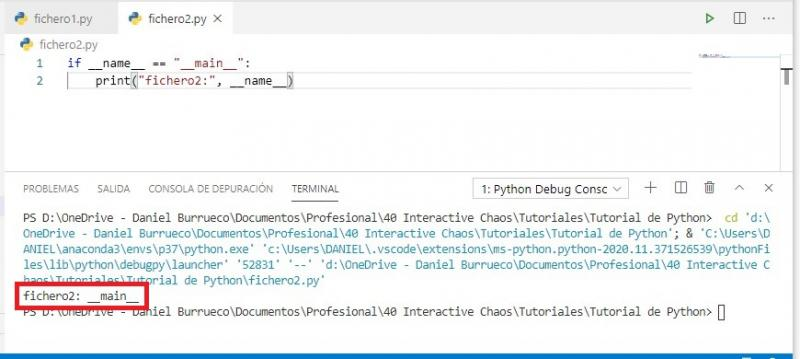

Sin embargo, si ejecutamos nuestro *fichero1* (desde el que se importa *fichero2*), el resultado ahora no es el mismo que habíamos obtenido anteriormente:

<div style="background:#f7f7f7;padding:10px;border:1px #ccc solid">
print("fichero1:", __name__)
</div>

fichero1: \_\_main__

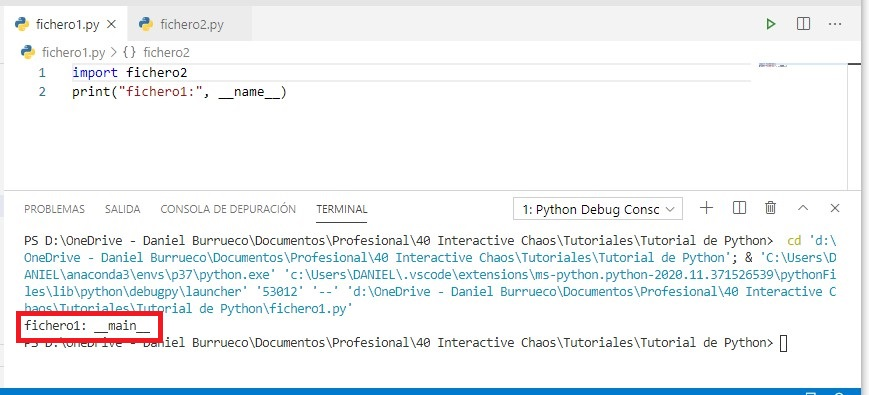

Analicemos en este caso el orden de ejecución del código:

1. En primer lugar se importa la librería *fichero2*. Esto provoca la ejecución del código *if* (*if \_\_name__ == "\_\_main__":*) que no se cumple pues, al ser importado como librería, la variable *\_\_name__* para dicho fichero no recibe el nombre "*\_\_main__*", sino el nombre del fichero ("*fichero2*"). Como consecuencia, no se ejecuta la función *print*.
1. Se ejecuta el *print* del fichero principal.

Como vemos, esto nos permite añadir en nuestros ficheros código de pruebas que no deba ejecutarse cuando el fichero sea importado, la creación de clases o definición de funciones que no deban ser parte de la interfaz de la librería, etc.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>